## Create a classifier to predict the wine color from wine quality attributes using this dataset: http://archive.ics.uci.edu/ml/datasets/Wine+Quality

## The data is in the database we've been using
+ host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com'
+ database='training'
+ port=5432
+ user='dot_student'
+ password='qgis'
+ table name = 'winequality'

In [1]:
import pg8000
conn = pg8000.connect(host='training.c1erymiua9dx.us-east-1.rds.amazonaws.com', database='training', port=5432, user='dot_student', password='qgis')

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import cross_val_score

## Query for the data and create a numpy array

In [3]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM information_schema.columns WHERE table_name= 'winequality'")
column_names = []
for row in cursor.fetchall():
    column_names.append(row[3])
print(column_names)

['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'color']


In [4]:
statement = "SELECT fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol, color FROM winequality"
cursor.execute(statement)
wine_quality = []
for row in cursor:
    wine_quality.append(row)

In [5]:
df = pd.DataFrame(wine_quality)
df.columns = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol', 'color']
df.head(3)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,color
0,7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,8.8,W
1,6.3,0.3,0.34,1.6,0.049,14,132,0.994,3.3,0.49,9.5,W
2,8.1,0.28,0.4,6.9,0.05,30,97,0.9951,3.26,0.44,10.1,W


## Split the data into features (x) and target (y, the last column in the table)

In [6]:
array = np.array(df)
x = array[:,:11]
y = array[:,11]

### Remember you can cast the results into an numpy array and then slice out what you want

## Create a decision tree with the data

In [7]:
dt = DecisionTreeClassifier()
dt = dt.fit(x,y)

## Run 10-fold cross validation on the model

In [8]:
scores = cross_val_score(dt,x,y,cv=10) 
scores

array([ 0.97538462,  0.98615385,  0.97692308,  0.98153846,  0.98153846,
        0.98307692,  0.97538462,  0.97230769,  0.98459168,  0.97685185])

## If you have time, calculate the feature importance and graph based on the code in the [slides from last class](http://ledeprogram.github.io/algorithms/class9/#21)

In [40]:
columns = list(df.columns)
columns

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'ph',
 'sulphates',
 'alcohol',
 'color']

(0, 1)

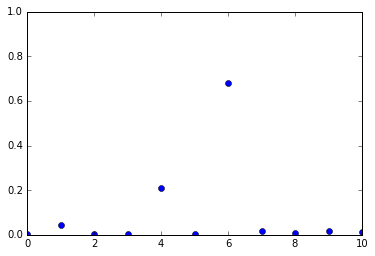

In [37]:
plt.plot(dt.feature_importances_, 'o')
plt.ylim(0,1)

### Use [this tip for getting the column names from your cursor object](http://stackoverflow.com/questions/10252247/how-do-i-get-a-list-of-column-names-from-a-psycopg2-cursor)

In [122]:
#alternative:

df = pd.read_sql('SELECT * FROM winequality', conn)
wine = df.as_matrix()

x = wine[:,:-1]
y = wine[:,-1]